In [3]:
import pandas as pd

In [113]:
data = pd.read_excel('statistic_id245347_total-medicaid-enrollment-1966-2022.xlsx',sheet_name = 'Data')
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Total Medicaid enrollment 1966-2022,NaN
2,NaN,Total Medicaid enrollment from 1966 to 2022 (i...,NaN
3,NaN,NaN,NaN
4,NaN,1966,4.0
5,NaN,1970,14.0
6,NaN,1975,20.2
7,NaN,1980,19.6
8,NaN,1985,19.8
9,NaN,1990,22.8


In [116]:
data = data.iloc[4:,1:]
data.columns = ['ds','y']
data['ds'] = pd.to_datetime(data['ds'].astype(str) + '-01-01')
data

,ds,y
4,1966-01-01,4.0
5,1970-01-01,14.0
6,1975-01-01,20.2
7,1980-01-01,19.6
8,1985-01-01,19.8
9,1990-01-01,22.8
10,1995-01-01,32.3
11,2000-01-01,34.1
12,2001-01-01,36.8
13,2002-01-01,40.4


In [117]:
data.set_index('ds', inplace=True)
data = data.resample('MS').mean() 
data = data.interpolate(method='linear')
data.reset_index(inplace=True)

In [120]:
# data.to_csv('total_enrollment_seires.csv')

In [118]:
train = data[data['ds']>'2004-12-31']

train

,ds,y
468,2005-01-01,45.800000
469,2005-02-01,45.783333
470,2005-03-01,45.766667
471,2005-04-01,45.750000
472,2005-05-01,45.733333
...,...,...
668,2021-09-01,88.766667
669,2021-10-01,89.275000
670,2021-11-01,89.783333
671,2021-12-01,90.291667


### Prediction

In [123]:
from prophet import Prophet
m = Prophet()
m.fit(train)

future = m.make_future_dataframe(periods=10,freq='YS')
forecast = m.predict(future)
forecast.iloc[-10:,-1]

18:48:51 - cmdstanpy - INFO - Chain [1] start processing
18:48:51 - cmdstanpy - INFO - Chain [1] done processing


205     94.776949
206    100.063168
207    105.717889
208    111.007137
209    116.294799
210    121.581018
211    127.235739
212    132.524987
213    137.812649
214    143.098868
Name: yhat, dtype: float64

In [125]:
result = pd.DataFrame(forecast[['ds','yhat']])
result.iloc[-9:,].to_csv('total_enrollment_pred.csv')

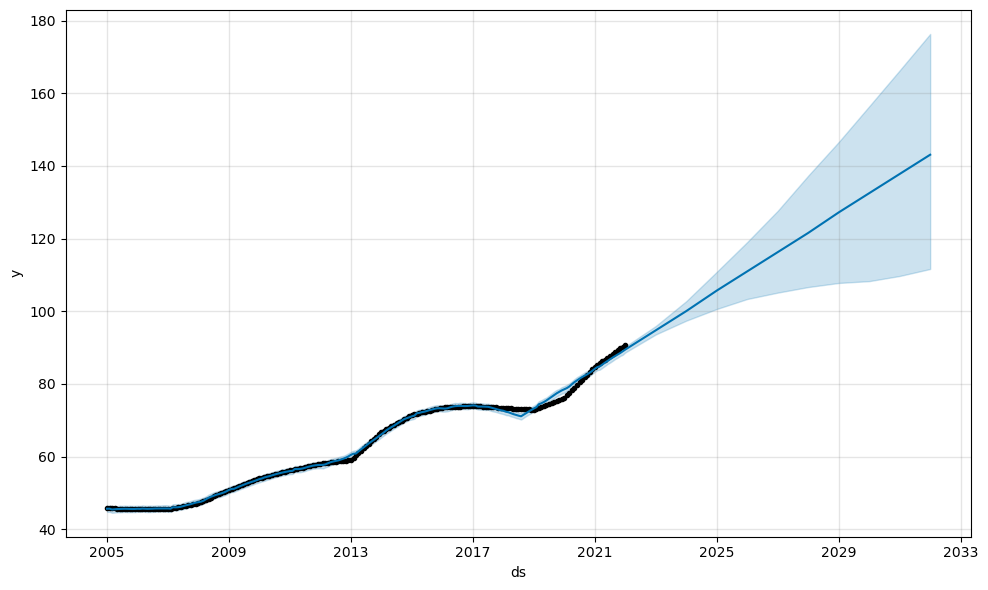

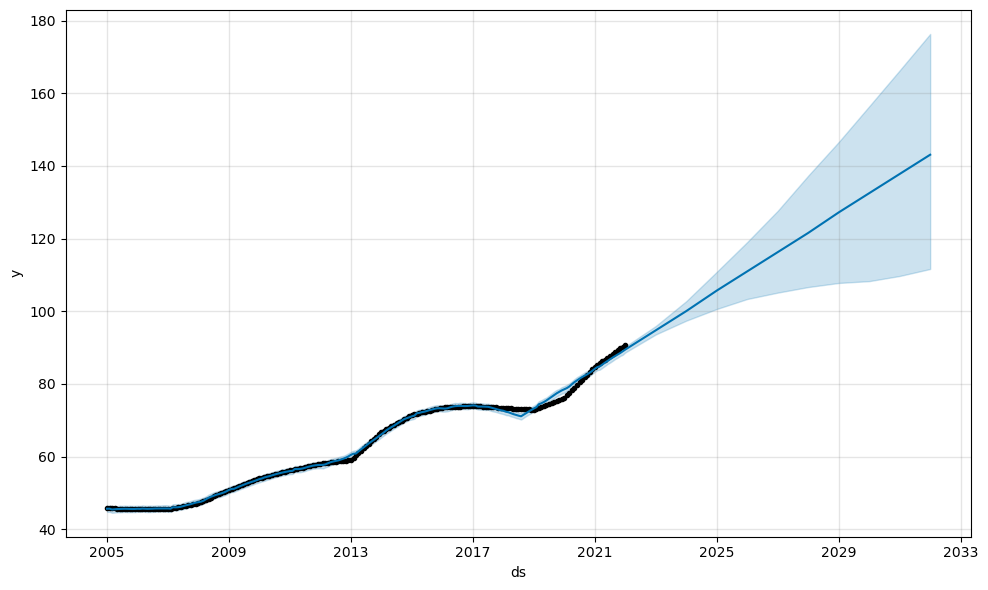

In [ ]:
m.plot(forecast)

## IL

In [141]:
il = pd.read_csv("IL_enrollment.csv")


In [142]:
il = il[['report_date','total_medicaid_enrollment']]
il.columns = ['ds','y']
il.loc[:,'ds'] = pd.to_datetime(il['ds'])
il.dropna(inplace=True)


In [143]:
il.set_index('ds', inplace=True)
il = il.resample('MS').mean() 
il = il.interpolate(method='spline',order = 3)
il.reset_index(inplace=True)

In [131]:
il.to_csv('il_enrollment_1.csv')

In [144]:
m = Prophet()
m.fit(il)

future = m.make_future_dataframe(periods=10,freq='YS')
forecast = m.predict(future)
forecast.iloc[-10:,-1]

19:02:42 - cmdstanpy - INFO - Chain [1] start processing


19:02:43 - cmdstanpy - INFO - Chain [1] done processing


79    3.494285e+06
80    3.488667e+06
81    3.561205e+06
82    3.634185e+06
83    3.707592e+06
84    3.701974e+06
85    3.774512e+06
86    3.847492e+06
87    3.920898e+06
88    3.915280e+06
Name: yhat, dtype: float64

In [146]:
# pd.DataFrame(forecast)[['ds','yhat']].iloc[-10:].to_csv('il_enrollment_pred.csv')

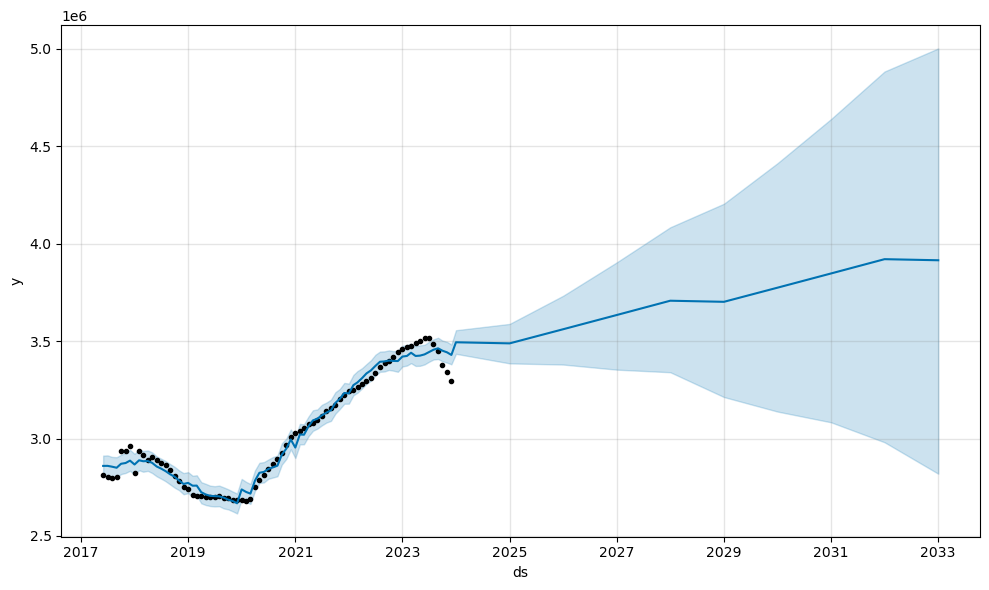

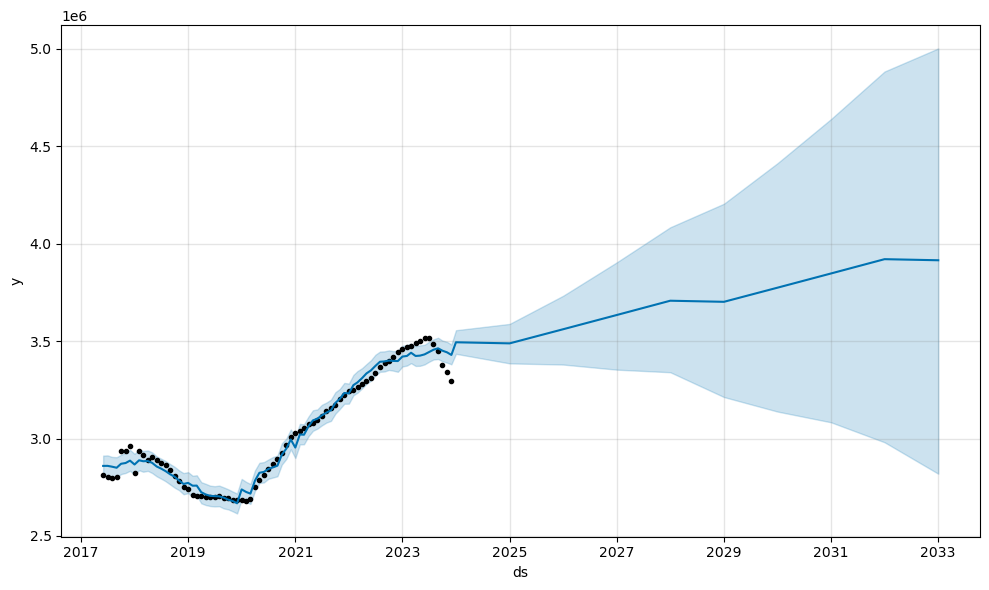

In [ ]:
m.plot(forecast)

### overall enrollment

In [151]:
pd.read_csv("country_enrollment.csv")[['state_name','total_medicaid_enrollment']].to_csv('overall_enrollment.csv')